# Welcome to Lending Club Case Study 

## Setp 1: Importing Data Set 
We can use numpy and panada library to deal with the data set, to plot the plots we can use seaborn and matplot library, given CSV file is imported as Oldloan_data 

In [5]:
## import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#reading the data
Oldloan_data = pd.read_csv("loan.csv")

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6428\1445551120.py:7: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  Oldloan_data = pd.read_csv("loan.csv")


## Step 2 : Understaning the Data 

In [6]:
##Data Set Shape
Oldloan_data.shape

(39717, 111)

In [4]:
## Listing the data set
Oldloan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
## Checking Data Type 
Oldloan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
## Checking the colomn names 
Oldloan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

#### Manual Observation 
By inspecting the data set manually , it is found that lot of columns have data as NA which are null values, some columns have data has single value, some coulmns have missing values. In the Next setp let us clean the data set. 

# Setp 3 : Data Cleaning¶
Column Treatment

### 1. Identifying Null valued columns 
Columns having single Values and Null values do not contribute to draw any useful insights, they can be remove from data set

In [9]:
## First let us check the null values  
Oldloan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [10]:
## Let us remove the columns with null values from our data set
Oldloan_data.dropna(how = 'all',axis = 1, inplace = True)
Oldloan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
## Now data set has only 57 columns , by manual inspection it is found that following columns have only a single value, which can also be droped 
Oldloan_data.drop(['pymnt_plan', 'initial_list_status','collections_12_mths_ex_med','policy_code','application_type', 'acc_now_delinq' ,'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', ], axis = 1, inplace = True)
Oldloan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [12]:
##Data Set Shape, 
Oldloan_data.shape

(39717, 48)

### 2. Attributes Categories 
Based on the description sheet,  columns in the data set are categorised into 4 categories as follows
1. Customer Attributes : emp_title, emp_length, home_ownership, annual_inc, verification_status, purpose, title, addr_state, open_acc, pub_rec, total_acc 
2. Loan Attributes : loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, issue_d, loan_status, revol_util  
3. Bank Generated attributes : id, member_id, url, desc, zip_code,  dti, earliest_cr_line, inq_last_6mths,      
4. Post loan approval attributes : delinq_2yrs, revol_bal, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee,recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, chargeoff_within_12_mths, last_credit_pull_d, mths_since_last_delinq, mths_since_last_record,  

    
Since post loan approval attributes do not actually determine the criteria on whether to lend the loan or not, and hence these columns can also be removed.
Also some bank generated attributes like id, member_id, url, desc, zip_code: customer attributes like emp_title,addr_state does not give much insight for default determination thus we can remove these columns as well

In [13]:
Oldloan_data.drop(['id', 'member_id', 'url', 'desc', 'zip_code', 'addr_state', 'emp_title', 'delinq_2yrs', 'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee','recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'chargeoff_within_12_mths', 'last_credit_pull_d', 'mths_since_last_delinq', 'mths_since_last_record'], axis = 1, inplace = True)
Oldloan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,title,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Fully Paid,credit_card,Computer,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Charged Off,car,bike,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Fully Paid,small_business,real estate business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Fully Paid,other,personel,20.00,Feb-96,1,10,0,21%,37
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,Current,other,Personal,17.94,Jan-96,0,15,0,53.90%,38


In [14]:
Oldloan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc'],
      dtype='object')

Upon close observation of the columns funded_amnt and funded_amnt_inv it is found that what we need for analysis is ' total amount committed by investors', and hence 'funde_amnt' column can also be removed. The loan 'title' provided by the borrower is simalr to 'purpose', we can keep only purpose column and delete the 'title'

In [15]:
Oldloan_data.drop(['title', 'funded_amnt'], axis = 1, inplace = True)
print(Oldloan_data.columns)
print(Oldloan_data.shape)

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')
(39717, 21)


### Finally after all possible column treatment we are left with 21 columns for our analysis

## Row Treatment 

Since our objective is to find who is likey to default , the data on current payments is not useful to draw any conclusion and hence we can remove the rows with current payment details

In [16]:
Oldloan_data = Oldloan_data[Oldloan_data.loan_status != "Current"]

In [17]:
## To check the remaning unique values in loan status columns 
Oldloan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

## Missing Value Treatment 

Now using panda functions we will check the missing values in the data set

In [18]:
Oldloan_data.isna().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
dtype: int64

It is found that only emp_length and revol_util has missing values, we can check for the percentage of missing values to take further decision

In [19]:
(Oldloan_data.isna().sum()/len(Oldloan_data.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

Missing values can be assigned with the most repeated value in the column since the percentage of missing values is very less. To do that first we will find the 'mode' and assign the mode value to missing values. 

In [20]:
print("Mode Value is " + Oldloan_data.emp_length.mode()[0])
Oldloan_data.emp_length.fillna(Oldloan_data.emp_length.mode()[0], inplace = True)
##To check for missing values after treatmen
Oldloan_data.emp_length.isna().sum()

Mode Value is 10+ years


0

## Standardization of Data 
Let us check the data set and data types once to check for any deviation from standard format 

In [21]:
Oldloan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12


In [22]:
Oldloan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           38577 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

Remove Extra characters 
1. It is found that the columns 'int_rate' and 'revol_util' is represnting % values , however data set is a combination of int and string type, we can remove the % symbol.
2. The columns 'term', 'sub_grade' and 'emp_length' is a combination of text and int value, for 'sub_grade' and 'emp_length' we can separate the string values and only keep the int, however the column 'term' which only has 2 values 36 month and 60 month we don't need to remove string.

In [23]:
Oldloan_data.int_rate = pd.to_numeric(Oldloan_data.int_rate.apply(lambda x : x.split('%')[0]))
Oldloan_data.emp_length = pd.to_numeric(Oldloan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
Oldloan_data.sub_grade = pd.to_numeric(Oldloan_data.sub_grade.apply(lambda x : x[-1]))
Oldloan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12


In [24]:
## Since revol_uti also has missing values , first it need to be treated before going for standardization, here also we will replace the missing value with mode
Oldloan_data.revol_util.fillna(Oldloan_data.revol_util.mode()[0], inplace = True)
Oldloan_data.revol_util = pd.to_numeric(Oldloan_data.revol_util.apply(lambda x : x.split('%')[0]))
Oldloan_data.revol_util.isna().sum()

0

In [25]:
Oldloan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


## Outliers
From the manual observation it is required to check outliers for the following columns 
1. loan_amnt
2. funded_amnt_inv
3. int_rate
4. installment
5. annual_inc
6. dti
7. inq_last_6mths
8. open_acc
9. revol_util
10. total_acc

In [26]:
## Let us check the continuity in the values using quantile method 
Oldloan_data.loan_amnt.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     9600.0
0.750    15000.0
0.900    21600.0
0.950    25000.0
0.970    28000.0
0.975    30000.0
0.980    30000.0
0.985    35000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

In [27]:
Oldloan_data.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8733.440000
0.750    14000.000000
0.900    19975.000000
0.950    24500.066590
0.970    25750.000000
0.975    27975.000000
0.980    29879.258133
0.985    30000.000000
0.990    34715.012285
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

In [28]:
Oldloan_data.int_rate.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500    11.710
0.750    14.380
0.900    16.820
0.950    18.312
0.970    19.290
0.975    19.690
0.980    19.910
0.985    20.300
0.990    20.990
1.000    24.400
Name: int_rate, dtype: float64

In [29]:
Oldloan_data.installment.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     277.8600
0.750     425.5500
0.900     620.9000
0.950     760.8200
0.970     830.8444
0.975     849.7200
0.980     870.3900
0.985     888.2552
0.990     931.0900
1.000    1305.1900
Name: installment, dtype: float64

In [30]:
Oldloan_data.annual_inc.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500      58868.0
0.750      82000.0
0.900     115000.0
0.950     140004.0
0.970     165000.0
0.975     175000.0
0.980     187000.0
0.985     200000.0
0.990     234144.0
1.000    6000000.0
Name: annual_inc, dtype: float64

In [31]:
Oldloan_data.dti.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500    13.37
0.750    18.56
0.900    22.29
0.950    23.80
0.970    24.51
0.975    24.67
0.980    24.85
0.985    25.23
0.990    26.53
1.000    29.99
Name: dti, dtype: float64

In [32]:
Oldloan_data.inq_last_6mths.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500    1.0
0.750    1.0
0.900    2.0
0.950    3.0
0.970    3.0
0.975    3.0
0.980    3.0
0.985    3.0
0.990    4.0
1.000    8.0
Name: inq_last_6mths, dtype: float64

In [33]:
Oldloan_data.open_acc.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     9.0
0.750    12.0
0.900    15.0
0.950    17.0
0.970    19.0
0.975    20.0
0.980    20.0
0.985    21.0
0.990    22.0
1.000    44.0
Name: open_acc, dtype: float64

In [34]:
Oldloan_data.revol_util.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500    49.0
0.750    72.2
0.900    87.8
0.950    93.5
0.970    95.9
0.975    96.5
0.980    97.1
0.985    97.7
0.990    98.5
1.000    99.9
Name: revol_util, dtype: float64

In [35]:
Oldloan_data.total_acc.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500    20.0
0.750    29.0
0.900    38.0
0.950    43.0
0.970    48.0
0.975    49.0
0.980    51.0
0.985    53.0
0.990    56.0
1.000    90.0
Name: total_acc, dtype: float64

#### Outlier Checking using quantile method
From quantile we found that values are continous for most of the columns , however for the columns 'anuual income' after 95% the values are going out of range, we can visalize this using box plot 

C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

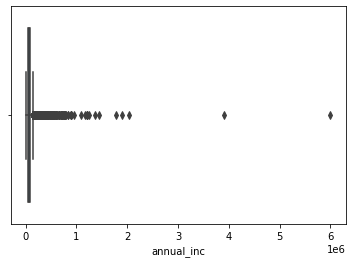

In [36]:
sns.boxplot(Oldloan_data['annual_inc'])

From the box plot it it is clear that outliers exist in annual income and it must be treated, and also after seeing quantile distribution variation is observed after 95% , we can remove the values after 95%.

In [37]:
per_95_annual_inc = Oldloan_data['annual_inc'].quantile(0.95)

In [38]:
Oldloan_data = Oldloan_data[Oldloan_data.annual_inc <= per_95_annual_inc]

C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

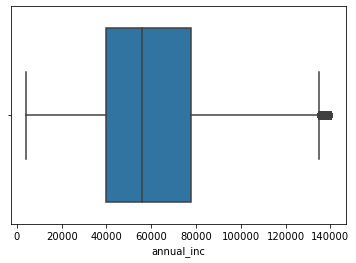

In [39]:
sns.boxplot(Oldloan_data['annual_inc'])

# Step 4 : Data Analysis 

We have the following category of variables 
1. Unordered Categorical Variables : home_ownership, verification_status, loan_status, purpose, 
2. Ordered Categorical Variables : term, grade, sub_grade, issue_d, earliest_cr_line, 
3. Numerical Variables : loan_amnt, funded_amnt_inv, int_rate, installment, emp_length, annual_inc, dti,inq_last_6mths, open_acc, pub_rec, revol_util, total_acc 


## Univariate Analysis 
Let us visualize the above category of variables and try to extract some meaningful patterns for charged off applicants  

### 1. Unordered Categorical Variables 

<AxesSubplot:xlabel='loan_status', ylabel='count'>

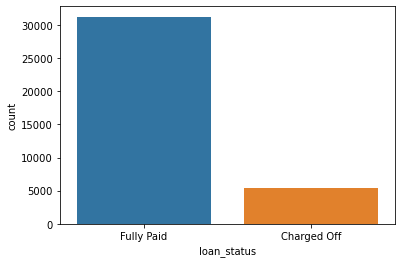

In [40]:
## Loan status 
sns.countplot(x = 'loan_status', data = Oldloan_data)

It of very clear from the above graph that most of the applicants in the data set  has fully paid the loan and only around 5000 applicants chraged off, let us analyze the remaining variables only for these charged off applicants

<AxesSubplot:xlabel='verification_status', ylabel='count'>

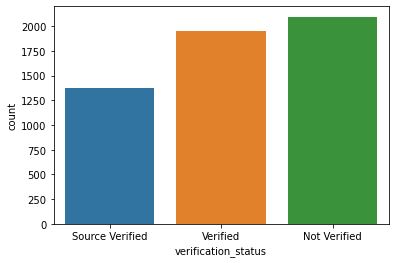

In [41]:
## Verification status plot 
sns.countplot(x='verification_status', data=Oldloan_data[Oldloan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

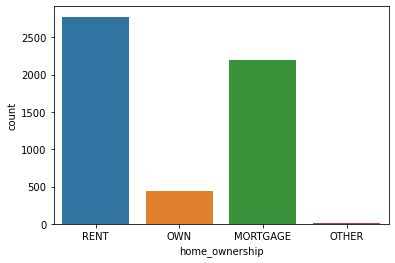

In [42]:
## House ownership plot
sns.countplot(x='home_ownership', data=Oldloan_data[Oldloan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='purpose', ylabel='count'>

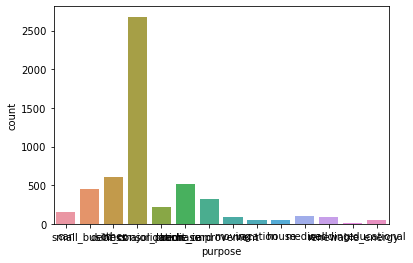

In [43]:
# Purpose Plot
sns.countplot(x ='purpose', data=Oldloan_data[Oldloan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='count', ylabel='purpose'>

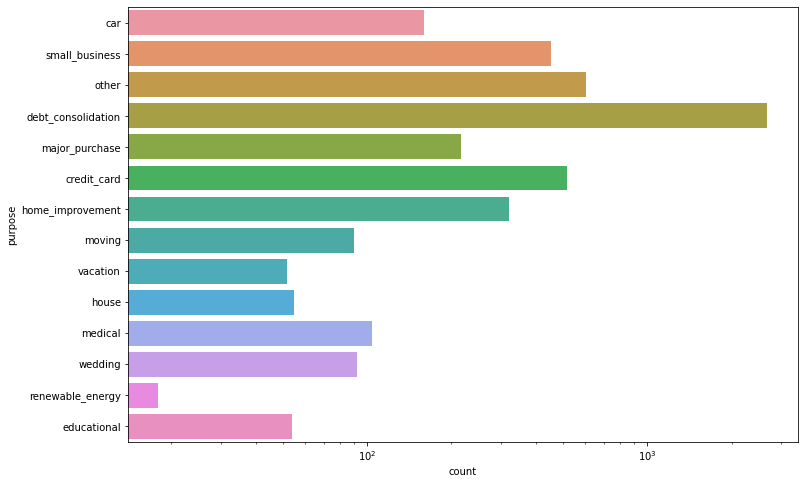

In [44]:
## Let us change the scale to log scale and y axis to have better visualization 
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=Oldloan_data[Oldloan_data.loan_status == 'Charged Off'])

#### Observations for Unordered categorical variables 
 Most of the data set if for fully paid applicants , only around 5000 applicants charged off,  Analyzing the other variables for charged off applicants shows us that, 
 1. Applicants who are not verified and whose source is not verified tend to default more, it is suggested to varify both income and income source before lending the loan 
 2. Applicants who are living in the rented home and who mortgaged home tend to default more , it is suggested to 

### 2. Ordered Categorical Variables 

<AxesSubplot:xlabel='term', ylabel='count'>

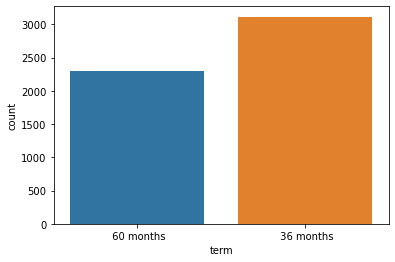

In [45]:
# Analyzing the term 
sns.countplot(x='term', data=Oldloan_data[Oldloan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='grade', ylabel='count'>

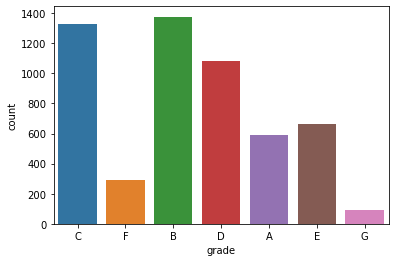

In [46]:
## Loan Grade  
sns.countplot(x = 'grade', data = Oldloan_data[Oldloan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

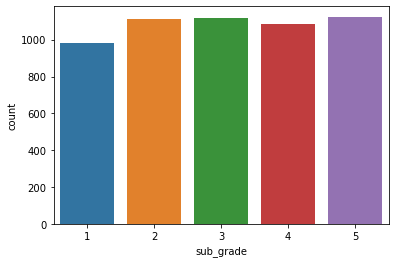

In [47]:
## Loan Subgrade
sns.countplot(x = 'sub_grade', data = Oldloan_data[Oldloan_data.loan_status == 'Charged Off'])

In [48]:
## Since issue date is expressed in month and year , we can split the column into 2 derived columns such as issue month and issue date 
df_month_year = Oldloan_data['issue_d'].str.partition("-", True)     
Oldloan_data['issue_month']=df_month_year[0]                       
Oldloan_data['issue_year']='20' + df_month_year[2]

In [49]:
Oldloan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,credit_card,27.65,Jan-85,1,3,0,83.7,9,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,car,1.00,Apr-99,5,3,0,9.4,4,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,small_business,8.72,Nov-01,2,2,0,98.5,10,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,other,20.00,Feb-96,1,10,0,21.0,37,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,wedding,11.20,Nov-04,3,9,0,28.3,12,Dec,2011


<AxesSubplot:xlabel='issue_month', ylabel='count'>

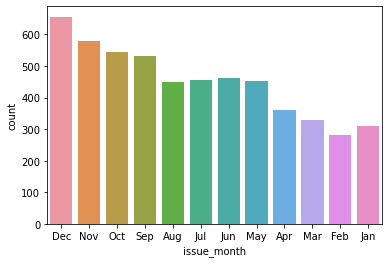

In [50]:
sns.countplot(x='issue_month', data=Oldloan_data[Oldloan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='issue_year', ylabel='count'>

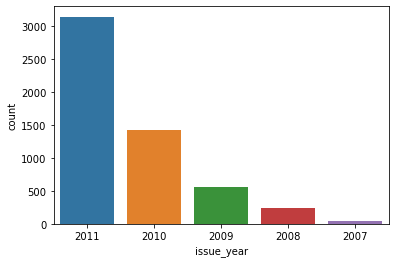

In [51]:
sns.countplot(x='issue_year', data=Oldloan_data[Oldloan_data['loan_status']=='Charged Off'])

Since earliest credit line is the month the borrower's earliest reported credit line was opened, it may not reflect anything on future defualt and hence this column can be ignored 

#### Observations for Ordered categorical variables 
Applicants with below attributed tend to default more:
Low term: The EMI will be more so tend to fail to replay the loan
B and C loan grade
Loan allotted in December: May be due to some year end financial distress
Issue year 2011: May be due to economical crisis in the market


### 3. Numerical Variables 
Numerical variables can be further split into 2 categories , in one such category we can directly use the numerical variable columns. In the second category we can use bins to segragate into separate groups

Category 1 : emp_length, pub_rec, inq_last_6mths,

Category 2 : loan_amnt_groups, funded_amnt_inv_group, int_rate_group, installment_groups, annual_inc_groups, dti_groups, open_acc_groups, revol_util_groups, total_acc_groups 


<AxesSubplot:xlabel='emp_length', ylabel='count'>

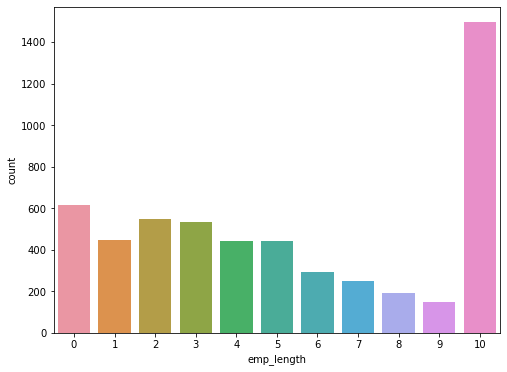

In [52]:
## Category 1 : Employee length
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(x='emp_length', data=Oldloan_data[Oldloan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

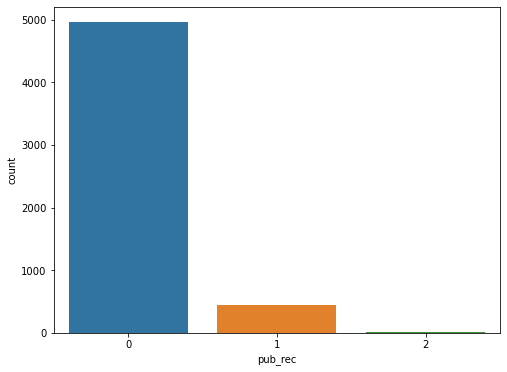

In [53]:
## Category 1 : pub_rec
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(x='pub_rec', data=Oldloan_data[Oldloan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='count', ylabel='inq_last_6mths'>

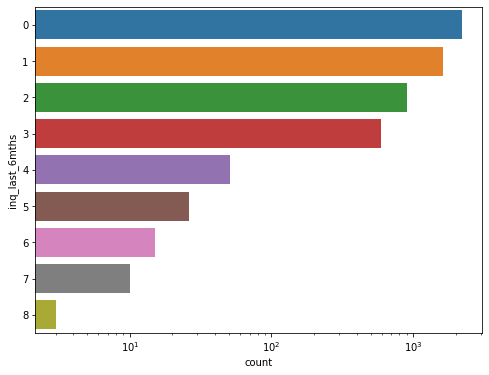

In [54]:
## Category 1 : inq_last_6mths
fig, ax = plt.subplots(figsize = (8,6))
ax.set_xscale('log')
sns.countplot(y='inq_last_6mths', data=Oldloan_data[Oldloan_data['loan_status']=='Charged Off'])

#### Observations for Numerical categorical variables - Category 1 

In [55]:
## Category 2 : First let us make some bins to segragate these category 2 variables into different groups 
Oldloan_data['installment_groups'] = pd.cut(Oldloan_data['installment'], bins=10,precision =0,labels=['0-130','130-260','260-390','390-520','520-650','650-780','780-810','810-940','940-1070','1070-1305'])
Oldloan_data['funded_amnt_inv_group'] = pd.cut(Oldloan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) 
Oldloan_data['loan_amnt_groups'] = pd.cut(Oldloan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
Oldloan_data['dti_groups'] = pd.cut(Oldloan_data['dti'], bins=6,precision =0,labels=['0-5','5-10','10-15','15-20','20-35','30-35'])
Oldloan_data['int_rate_groups'] = pd.cut(Oldloan_data['int_rate'], bins=6,precision =0,labels=['5%-8%','8%-11%','11%-14%','14%-17%','17%-20%','20%-24%'])
Oldloan_data['open_acc_groups'] = pd.cut(Oldloan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-18','18-24','24-32','32-44'])
Oldloan_data['revol_util_groups'] = pd.cut(Oldloan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
Oldloan_data['total_acc_groups'] = pd.cut(Oldloan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
Oldloan_data['annual_inc_groups'] = pd.cut(Oldloan_data['annual_inc'], bins=6,precision =0,labels =['3k-30k','30k-50k','50k-70k','70k-90k','90k-110k','110k-140k'])

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

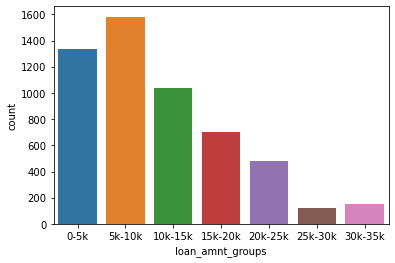

In [56]:
## Category 2 (Numerical Variables) : Loan Amount Groups
sns.countplot(x='loan_amnt_groups', data=Oldloan_data[Oldloan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='funded_amnt_inv_group', ylabel='count'>

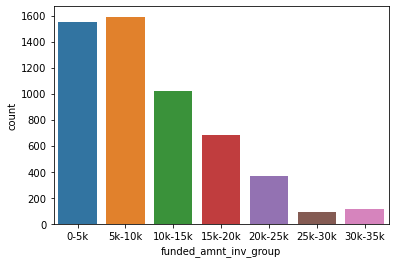

In [57]:
## Category 2 (Numerical Variables) : Funded amount by invester Groups
sns.countplot(x='funded_amnt_inv_group', data=Oldloan_data[Oldloan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='installment_groups', ylabel='count'>

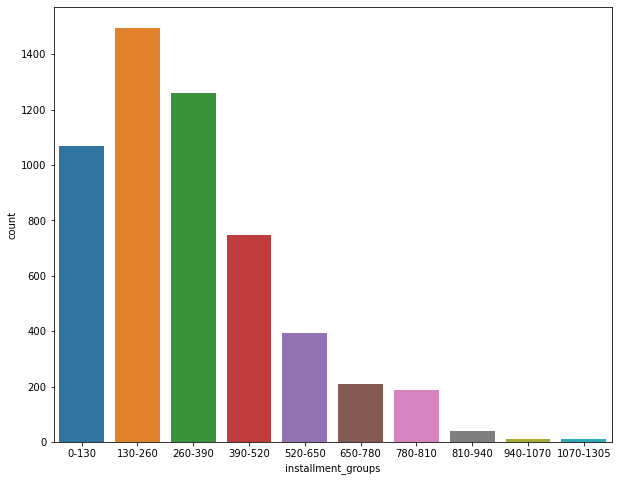

In [58]:
## Category 2 (Numerical Variables) : Installment Groups
fig, ax = plt.subplots(figsize = (10,8))
sns.countplot(x='installment_groups', data=Oldloan_data[Oldloan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='int_rate_groups', ylabel='count'>

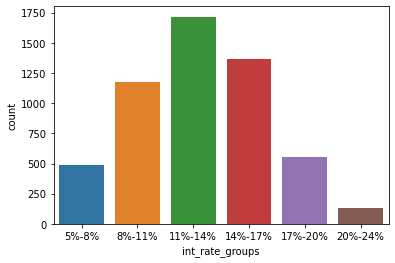

In [59]:
## Category 2 (Numerical Variables) : Interest Rate Groups
sns.countplot(x='int_rate_groups', data=Oldloan_data[Oldloan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

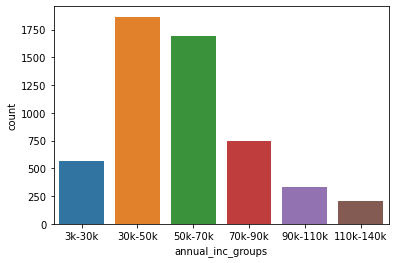

In [60]:
## Category 2 (Numerical Variables) : Annual Income Groups
sns.countplot(x='annual_inc_groups', data=Oldloan_data[Oldloan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='revol_util_groups', ylabel='count'>

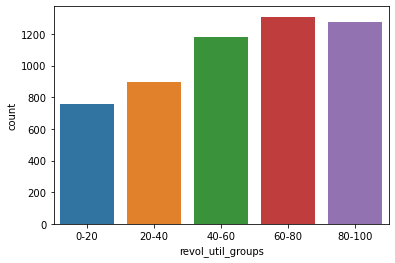

In [61]:
## Category 2 (Numerical Variables) : Revolving line utilization rate Groups
sns.countplot(x='revol_util_groups', data=Oldloan_data[Oldloan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='open_acc_groups', ylabel='count'>

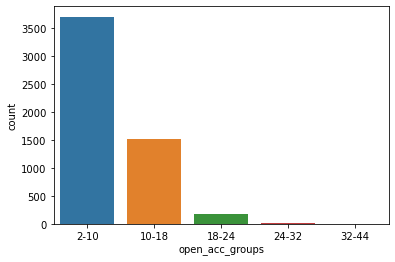

In [62]:
## Category 2 (Numerical Variables) :Open account Groups
sns.countplot(x='open_acc_groups', data=Oldloan_data[Oldloan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='total_acc_groups', ylabel='count'>

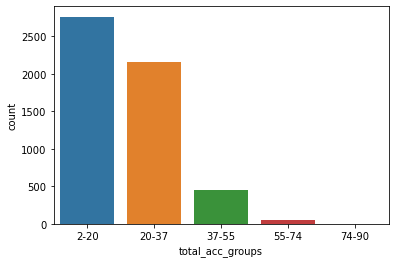

In [63]:
## Category 2 (Numerical Variables) : Total acount Groups
sns.countplot(x='total_acc_groups', data=Oldloan_data[Oldloan_data.loan_status == 'Charged Off'])

#### Observations for Numerical categorical variables
Employment term more than 10 years tend to default more than other. May be due to family commitment and other financial burden.
People with Zero public record are more defaulters.
Applicants who enquired about loans more often and have good understanding of their loan payment paid properly compared to those who never enquired about the loan.
Reason for the Default could be lack of awareness
Applicants who are taking smaller loan amount up to 15k are the ones who are likely to default more.
Funded amount also reflects the same behavior since small loans gets funded easily
Since heavy interest rate is on heavy loan amount which is also given to high annual income people they tend to default.
People who have middle income rate such as 30k-70k tend to default more
People with Rev utilization rate are the more defaulter.
People who have least total amount and open account are more defaulter. 



##  Bivariate Analysis 

Earlier we had categorised columns into different categories , 2 important categories are 
1. Customer Attributes : emp_length, home_ownership, annual_inc, verification_status, purpose, open_acc, pub_rec, total_acc 
2. Loan Attributes : loan_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, issue_d, loan_status, revol_util  

In the customer attributes the most important variable which decides whether a LC should lend money or not is the "annual income" since it decides the capacity of an applicant to repay the loan. And hence let us consider Annual income and pair with other variables to check who is likely to pay or default. 

In the Loan attributes the most important variable which decides whether a LC should lend money or not is the "Loan amount" since it is the riskiest parameter. And hence let us consider "Loan amount" and pair with other variables to check who is likely to pay or default.

###  1. Annual Income Vs Other Variables 

<AxesSubplot:xlabel='annual_inc_groups', ylabel='emp_length'>

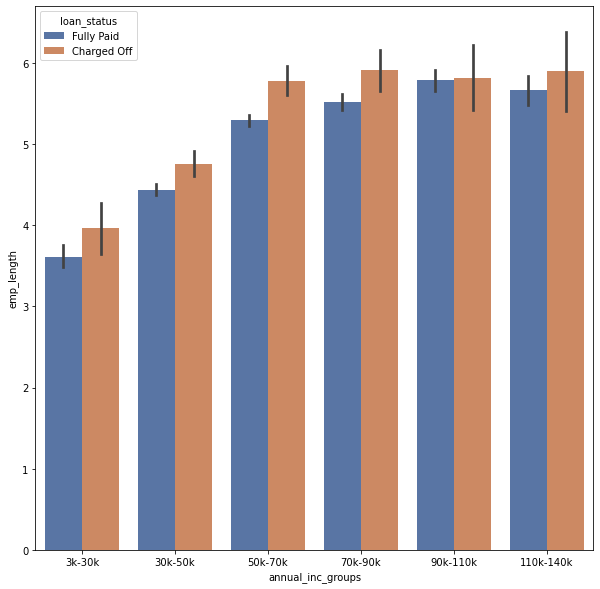

In [64]:
# Anuual Income vs employment length
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='annual_inc_groups', y='emp_length', hue ='loan_status',palette="deep")

<AxesSubplot:xlabel='annual_inc', ylabel='home_ownership'>

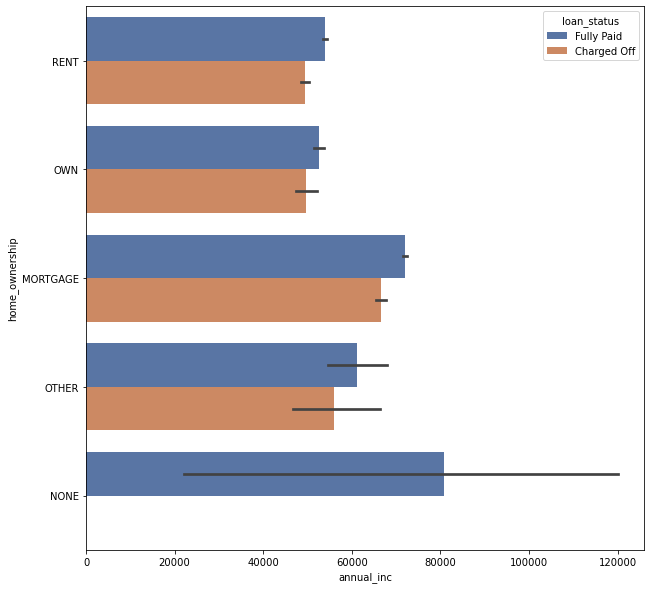

In [65]:
# Anuual Income vs home_ownership
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='annual_inc', y='home_ownership', hue ='loan_status',palette="deep")

<AxesSubplot:xlabel='annual_inc', ylabel='purpose'>

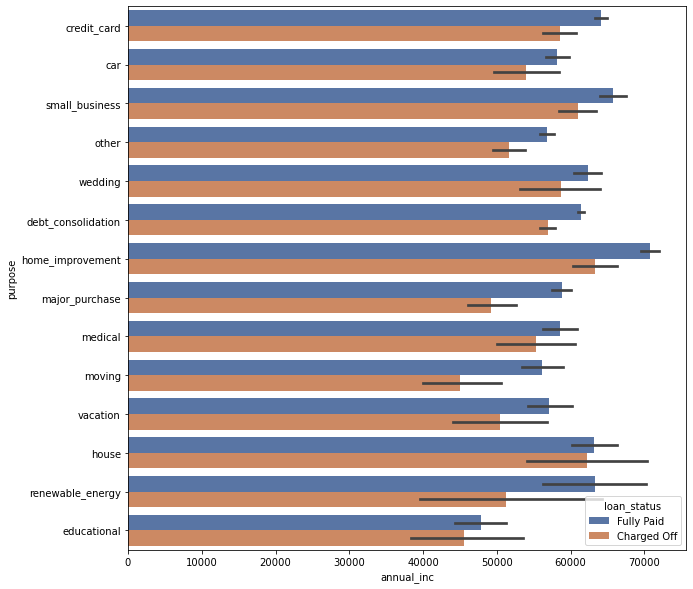

In [66]:
# Anuual Income vs purpose
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")

<AxesSubplot:xlabel='annual_inc_groups', ylabel='loan_amnt'>

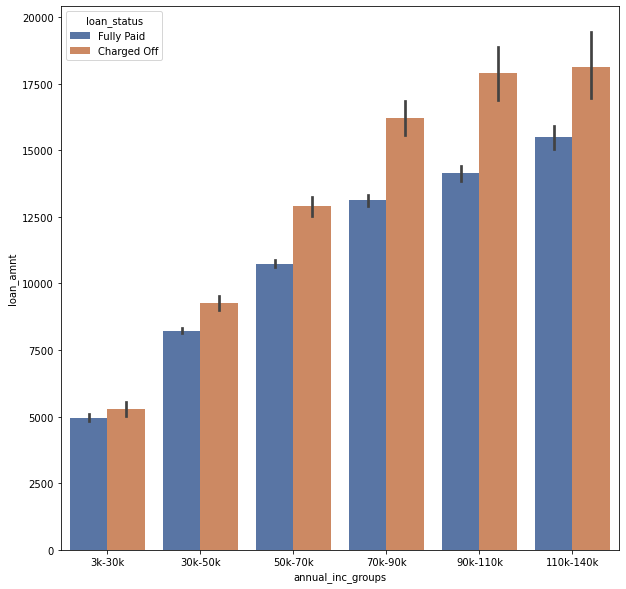

In [67]:
# Anuual Income vs loan_amnt
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='annual_inc_groups', y='loan_amnt', hue ='loan_status',palette="deep")

<AxesSubplot:xlabel='annual_inc', ylabel='term'>

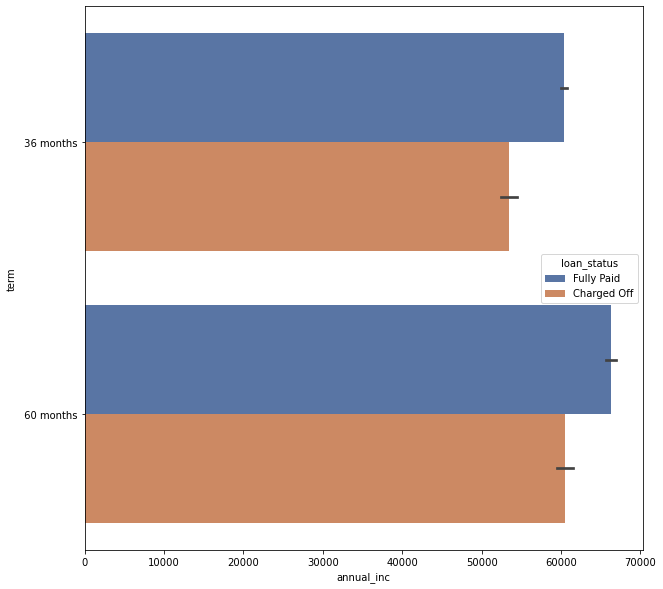

In [68]:
# Anuual Income vs term
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='annual_inc', y='term', hue ='loan_status',palette="deep")

<AxesSubplot:xlabel='annual_inc', ylabel='int_rate_groups'>

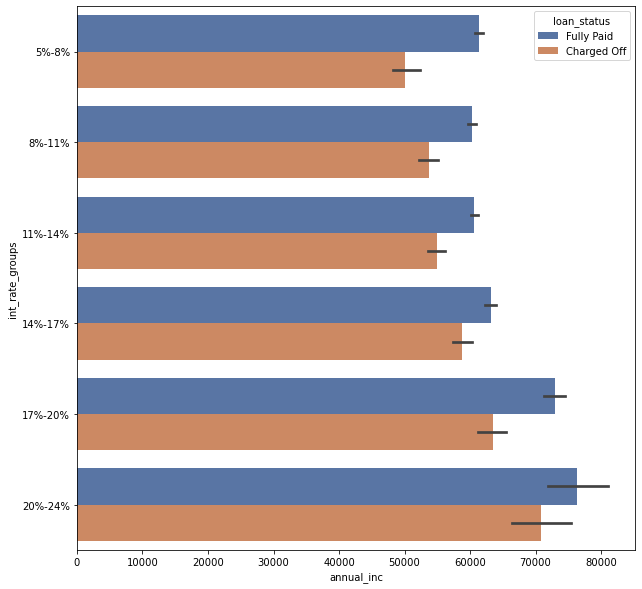

In [69]:
# Anuual Income vs int_rate
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='annual_inc', y='int_rate_groups', hue ='loan_status',palette="deep")

<AxesSubplot:xlabel='annual_inc_groups', ylabel='installment'>

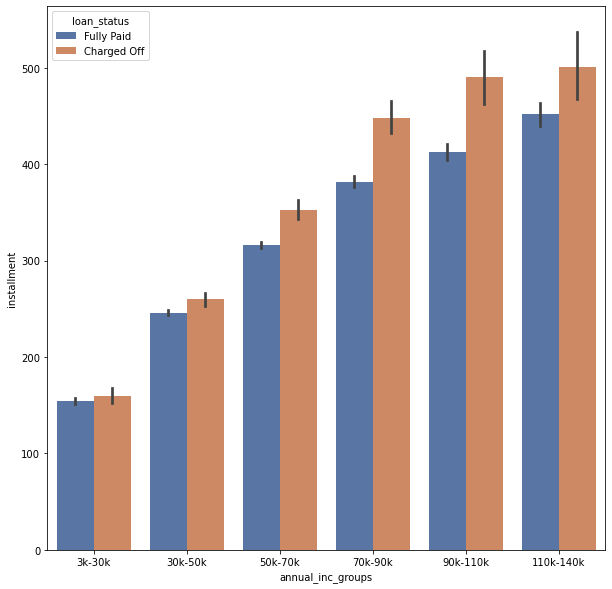

In [70]:
# Anuual Income vs installment
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='annual_inc_groups', y='installment', hue ='loan_status',palette="deep")

<AxesSubplot:xlabel='annual_inc', ylabel='grade'>

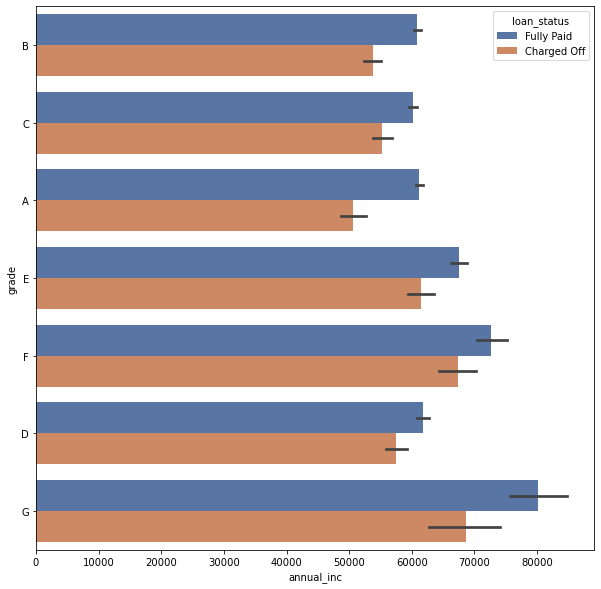

In [71]:
# Anuual Income vs grade
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='annual_inc', y='grade', hue ='loan_status',palette="deep")

###  2. Loan Amount Vs Other Variables 

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='emp_length'>

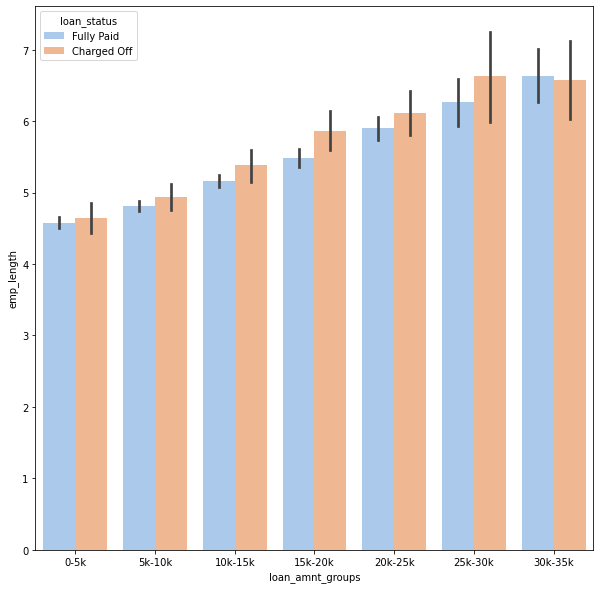

In [72]:
# Loan Amount vs employment length
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='loan_amnt_groups', y='emp_length', hue ='loan_status',palette="pastel")

<AxesSubplot:xlabel='loan_amnt', ylabel='home_ownership'>

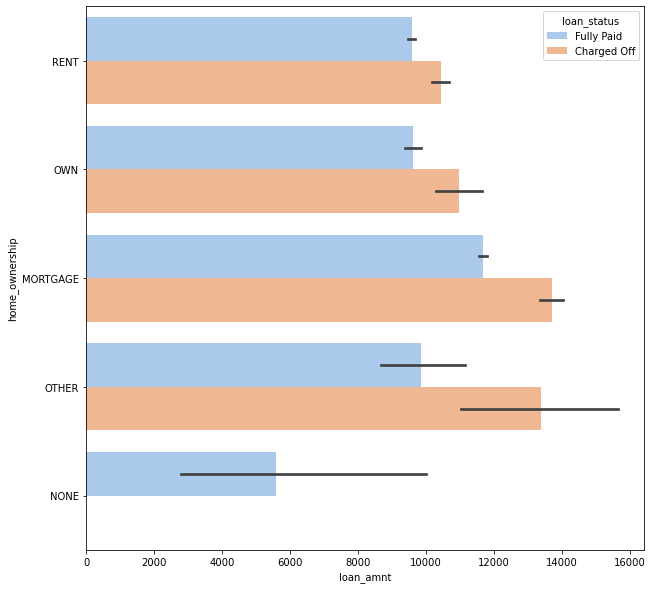

In [73]:
# Loan Amount vs home_ownership
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")

<AxesSubplot:xlabel='loan_amnt', ylabel='verification_status'>

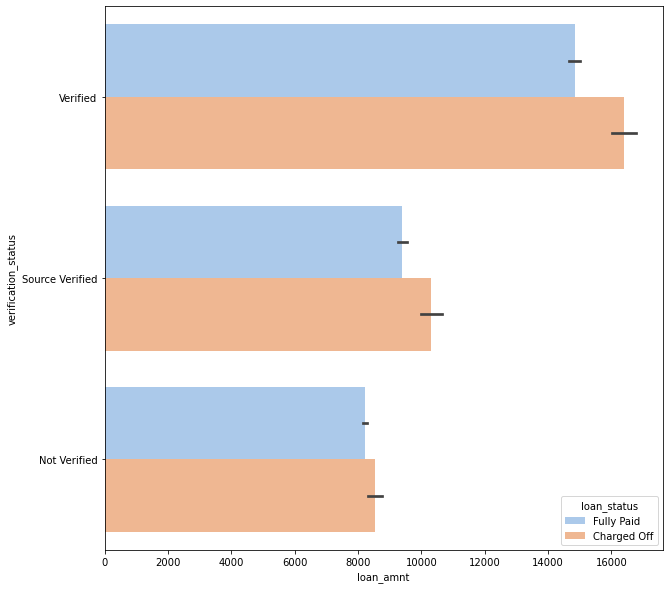

In [74]:
# Loan Amount vs verification_status
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='loan_amnt', y='verification_status', hue ='loan_status',palette="pastel")

<AxesSubplot:xlabel='loan_amnt', ylabel='purpose'>

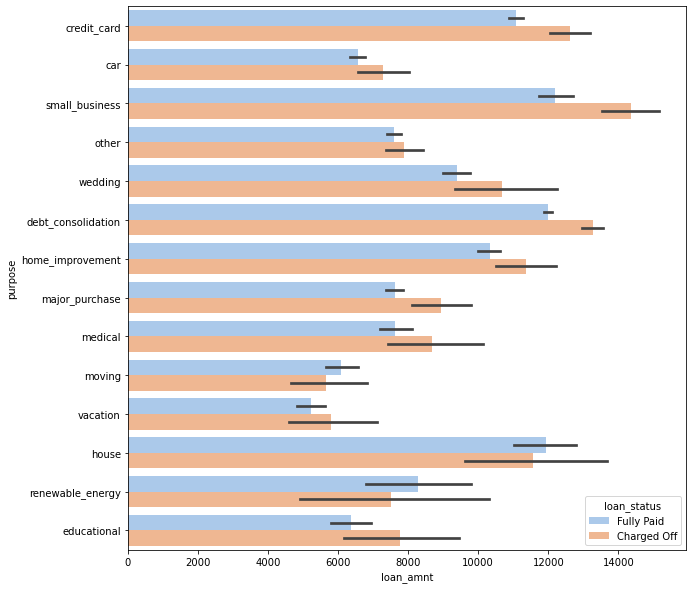

In [75]:
# Loan Amount vs purpose
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")

<AxesSubplot:xlabel='loan_amnt', ylabel='term'>

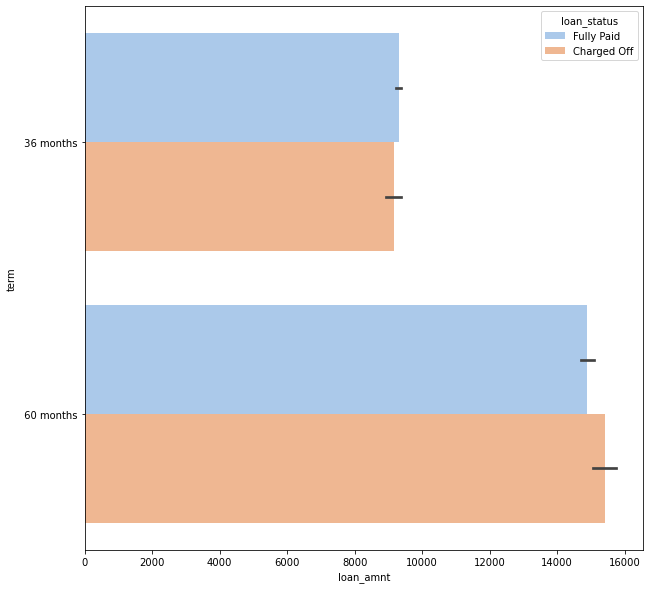

In [76]:
# Loan Amount vs term
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='loan_amnt', y='term', hue ='loan_status',palette="pastel")

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='int_rate'>

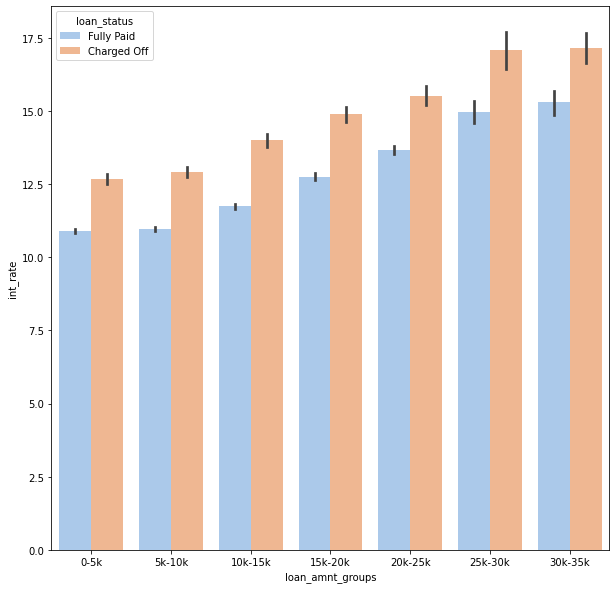

In [77]:
# Loan Amount vs int_rate
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='installment'>

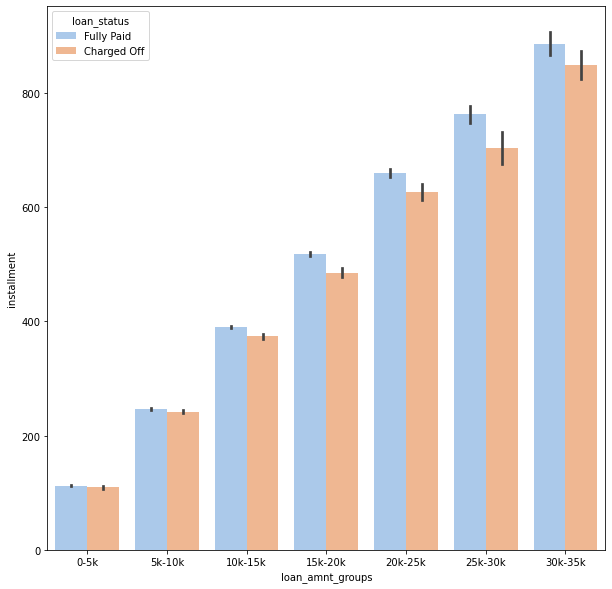

In [78]:
# Loan Amount vs installment
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='loan_amnt_groups', y='installment', hue ='loan_status',palette="pastel")

<AxesSubplot:xlabel='loan_amnt', ylabel='grade'>

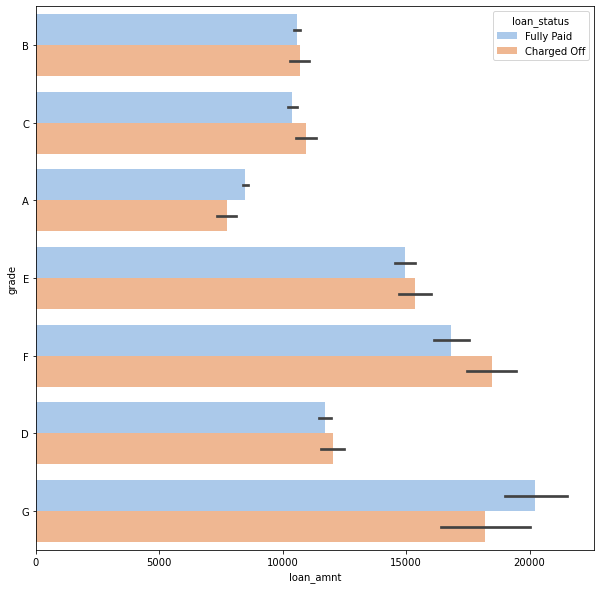

In [79]:
# Loan Amount vs grade
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel")

<AxesSubplot:xlabel='loan_amnt', ylabel='issue_month'>

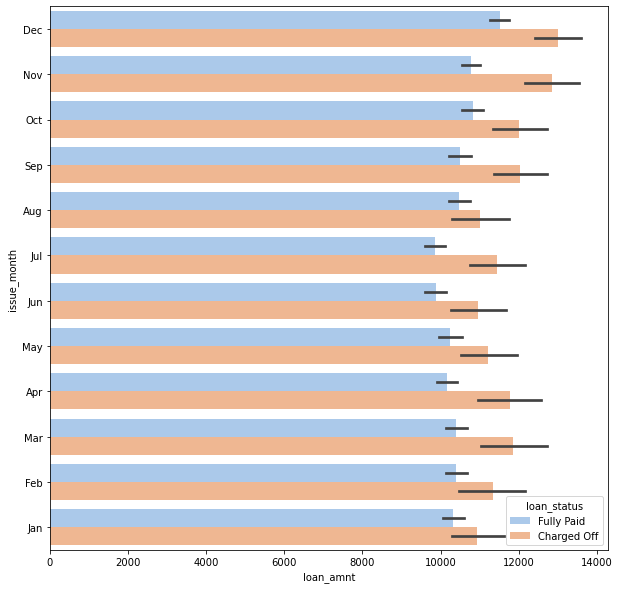

In [80]:
# Loan Amount vs issue_date
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='loan_amnt', y='issue_month', hue ='loan_status',palette="pastel")

###  3. Other Important Combinations

<AxesSubplot:xlabel='total_acc_groups', ylabel='open_acc'>

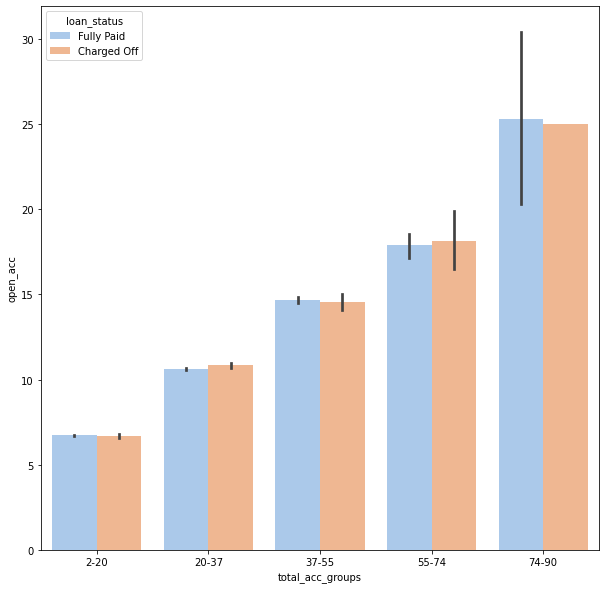

In [83]:
# Total account and Open account
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='total_acc_groups', y='open_acc', hue ='loan_status',palette="pastel")

<AxesSubplot:xlabel='int_rate', ylabel='grade'>

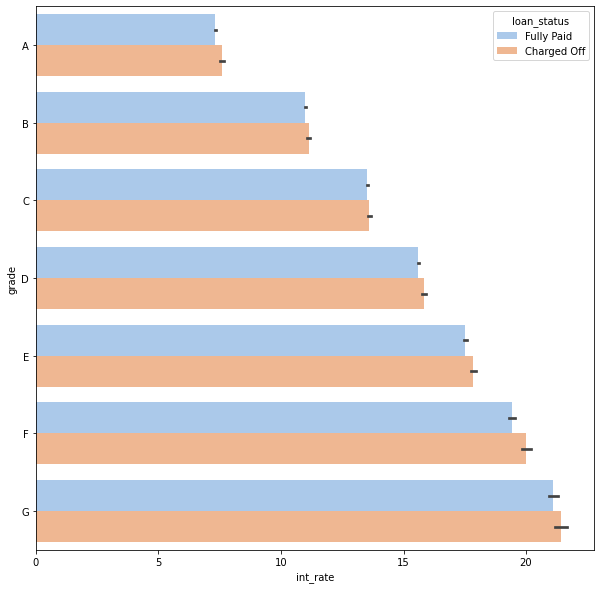

In [84]:
# Grade Vs Interest Rate
plt.figure(figsize=(10,10))
sns.barplot(data =Oldloan_data,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])

#Insights and Recommendations
It is highly suggested to verify income source for the applicants who are living in rented house, having medium level annual income (30k-70k) and requesting for high loan amount
It is suggested to avoid loan allotments for the applicants for the purpose such as debt consolidation and credit card with more number of open credit lines.
It is suggested to encourage to have more number of enquiry with LC officials so that they will be aware of loan repayment details.
It is suggested to reduced the interest rate for medium range loan amounts.
It is highly suggested to avoid high loan allotment to applicants having more than 10 years of experience and having mid level annual income (30k-70k)
It is suggested to upgrade the term for people having high loan amount which reduced the installment amount and the chances of defaulting
